### California House Price Prediction using XGBoost and python

In [2]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
# Reading the Dataset
housepdf = pd.read_csv('california_housing.csv')
print(housepdf.head(), housepdf.shape)


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200   (20640, 10)


In [5]:
# check missing values
housepdf.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
mean_total_bedrooms = housepdf['total_bedrooms']. mean()

In [13]:
housepdf["total_bedrooms"].fillna(mean_total_bedrooms, inplace = True)

C:\Users\somsh\AppData\Local\Temp\ipykernel_4508\3478501799.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housepdf["total_bedrooms"].fillna(mean_total_bedrooms, inplace = True)


In [14]:
housepdf.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

**Understanding the Correlation beteween the datapoints**

In [16]:
housepdf['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [17]:
# Sadly we need to do label Encoding :-(
from sklearn.preprocessing import LabelEncoder

In [18]:
labels = LabelEncoder().fit_transform(housepdf.ocean_proximity)
print(labels)

[3 3 3 ... 1 1 1]


In [19]:
# append and remove the columns which are not needed now
housepdf.drop(columns = "ocean_proximity", axis = 1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [20]:
# append 
housepdf["ocean_proximity"] = labels

In [21]:
housepdf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700


In [22]:
# Now do the Correlation
correlation = housepdf.corr()

<Axes: >

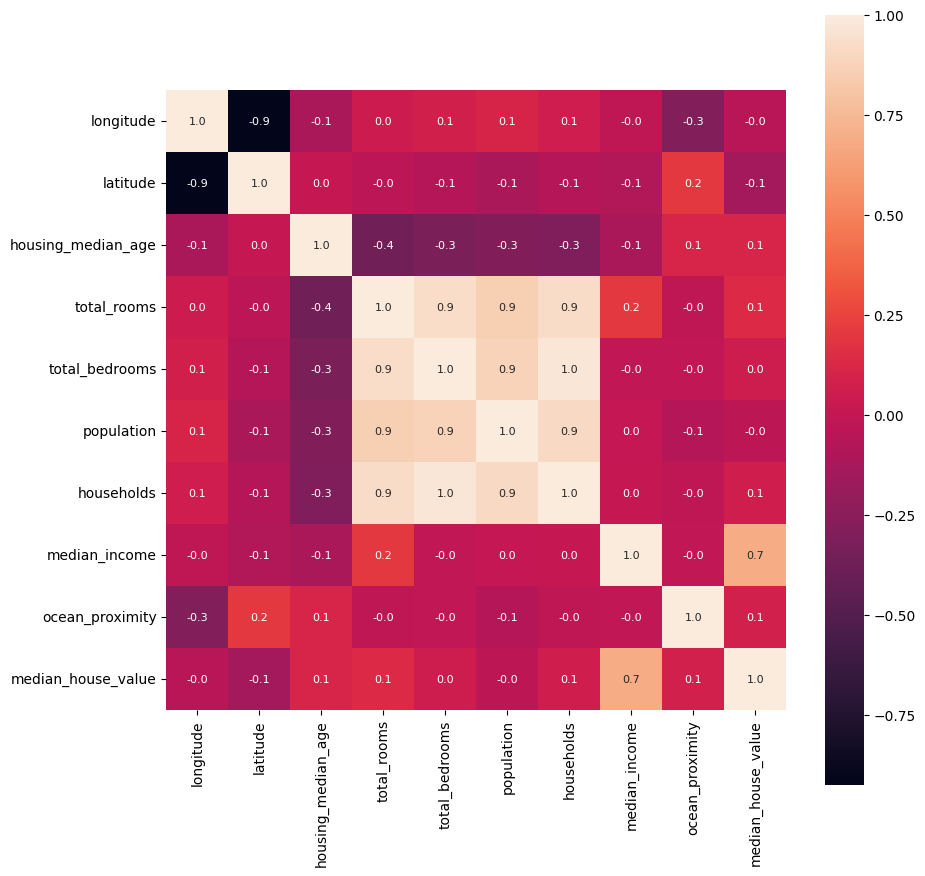

In [32]:
# Constructing a heatmap to understand correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size' : 8})

In [33]:
# Splitting the data and Target
x = housepdf.drop(columns = 'median_house_value')
y = housepdf['median_house_value']

In [34]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1


In [35]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

In [37]:
# train Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

#### Model Training  
XGBoost Regressor

In [40]:
# Loading the Model 
model = XGBRegressor()

In [41]:
model.fit(x_train ,y_train )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
# Model Evaluation
x_train_prediction = model.predict(x_train)

In [44]:
# prediction
x_train_prediction

array([ 62230.766, 286878.47 ,  51624.207, ..., 190925.38 , 168867.27 ,
        77311.76 ], dtype=float32)

In [47]:
# R squared Error
score_1 = metrics.r2_score(y_train, x_train_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, x_train_prediction)

print("R squared Error: ", score_1)
print("Mean Absolute Error: ", score_2)


R squared Error:  0.9375314712524414
Mean Absolute Error:  20311.96875


### Test Data Prediction 

In [48]:
x_test_prediction = model.predict(x_test)
x_test_prediction 

array([291455.28 , 179335.42 ,  88496.734, ..., 154666.19 ,  93972.625,
       237169.66 ], dtype=float32)

In [49]:
# R squared Error
test_score_1 = metrics.r2_score(y_test, x_test_prediction)

# Mean Absolute Error
test_score_2 = metrics.mean_absolute_error(y_test, x_test_prediction)

print("Test R squared Error: ", score_1)
print("Test Mean Absolute Error: ", score_2)


Test R squared Error:  0.9375314712524414
Test Mean Absolute Error:  20311.96875


### Model Prediction Plot

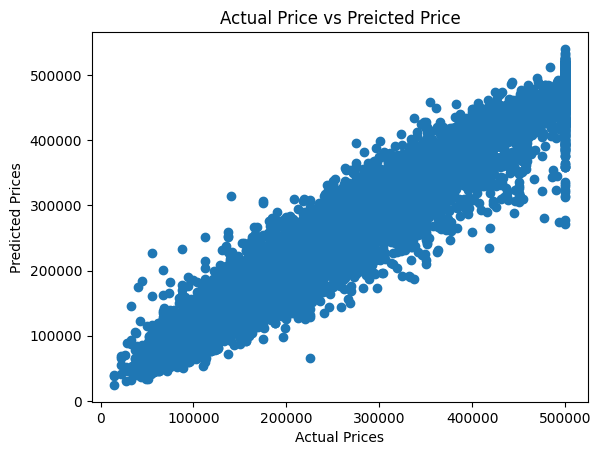

In [50]:
plt.scatter(y_train, x_train_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()